In [183]:
import numpy as np;
import pandas as pd;
# Max number of lines, pandas dataframe should display
pd.set_option('display.max_rows', 2);

from scipy import stats;

import seaborn as sn;

%matplotlib inline
import matplotlib.pyplot as plt;

# Configure default style settings for plot
from matplotlib import style
style.use('bmh')

# print(style.available)

# Enables zomming into matplotlib charts
import mpld3;
mpld3.enable_notebook();

import warnings;
warnings.filterwarnings('ignore');

- Data Collection is the first step in EDA. 
- Data may come from many different sources (comma-separated values (CSV) files, Excel files, web scrapes, binary files, and so on) and will often need to be standardized and first formatted together correctly.

The following exercise uses data from three different instruments, stored in `.csv` files.




In [184]:
df_eda_A = pd.read_csv('./data/EDA/A.csv', parse_dates=True, index_col=0);
df_eda_B = pd.read_csv('./data/EDA/B.csv', parse_dates=True, index_col=0);
df_eda_C = pd.read_csv('./data/EDA/C.csv', parse_dates=True, index_col=0);


df_eda_A

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-05-15,18251.970703,18272.720703,18215.070313,18272.560547,18272.560547,108220000
...,...,...,...,...,...,...
2020-05-14,23049.060547,23630.859375,22789.619141,23625.339844,23625.339844,472700000


In [185]:
df_eda_B

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-05-15,2122.070068,2123.889893,2116.810059,2122.72998,2122.72998,3092080000
...,...,...,...,...,...,...
2020-05-14,2794.540039,2852.800049,2766.639893,2852.50000,2852.50000,5641920000


In [186]:
df_eda_C

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-05-15,12.46,13.090000,12.350000,12.380000,12.380000,0
...,...,...,...,...,...,...
2020-05-14,35.16,39.279999,32.330002,32.610001,32.610001,0


  * Note that, all three files have date rage from 14/05/2015 to 14/05/2020. However, the number of rows differ in each dataset.

In [187]:
# Merging Datasets, into one. 

# First A & B are joined, then the result is joined with C
# This is an outer join
# The suffixes are identifiers added to the column names, to avoid name collisions
merged_df = df_eda_A.join(df_eda_B, how="outer", lsuffix='_A', sort=True).join(df_eda_C, how="outer", lsuffix='_B', rsuffix="_C",  sort=True);

In [188]:
# Check Rows where all values are missing 
merged_df[merged_df.isnull().all(axis=1)]

# Result: There are no rows with all values missing



,Open_A,High_A,Low_A,Close_A,Adj Close_A,Volume_A,Open_B,High_B,Low_B,Close_B,Adj Close_B,Volume_B,Open_C,High_C,Low_C,Close_C,Adj Close_C,Volume_C
Date,,,,,,,,,,,,,,,,,,


In [189]:
# Check if there are any close values missing... 
merged_df[['Close_A', 'Close_B', 'Close_C']].isnull().any(axis=1).sum()

148

In [190]:
# We need valid close values, for further analysis. Thus, we will drop any instruments with missing close values.
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html
valid_closedf = merged_df.dropna(subset=['Close_A', 'Close_B', 'Close_C'], how='any')

# Check again
valid_closedf[['Close_A', 'Close_B', 'Close_C']].isnull().any(axis=1).sum()

0

In [191]:
valid_closedf

,Open_A,High_A,Low_A,Close_A,Adj Close_A,Volume_A,Open_B,High_B,Low_B,Close_B,Adj Close_B,Volume_B,Open_C,High_C,Low_C,Close_C,Adj Close_C,Volume_C
Date,,,,,,,,,,,,,,,,,,
2015-05-15,18251.970703,18272.720703,18215.070313,18272.560547,18272.560547,108220000.0,2122.070068,2123.889893,2116.810059,2122.72998,2122.72998,3.092080e+09,12.46,13.090000,12.350000,12.380000,12.380000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-14,23049.060547,23630.859375,22789.619141,23625.339844,23625.339844,472700000.0,2794.540039,2852.800049,2766.639893,2852.50000,2852.50000,5.641920e+09,35.16,39.279999,32.330002,32.610001,32.610001,0.0


So far we have, 
- checked if any Null / NaN values are present along the row.  
- we found 148 rows of having null or missing values for close prices, and removed them. 


Now, we will deal with NaN values for all other fields. 

In [192]:
valid_closedf.isnull().any(axis=1).sum()

# there exits around 165 values with missing


165

In [193]:
# Inspect rows with null values
pd.set_option('display.max_rows', 7);
valid_closedf[valid_closedf.isnull().any(axis=1)]

,Open_A,High_A,Low_A,Close_A,Adj Close_A,Volume_A,Open_B,High_B,Low_B,Close_B,Adj Close_B,Volume_B,Open_C,High_C,Low_C,Close_C,Adj Close_C,Volume_C
Date,,,,,,,,,,,,,,,,,,
2015-05-18,18267.250000,18325.539063,18244.259766,18298.880859,18298.880859,79080000.0,2121.300049,2131.780029,2120.010010,2129.199951,2129.199951,2.888190e+09,13.080000,13.220000,NaN,12.730000,12.730000,0.0
2015-06-08,17849.460938,17852.349609,17760.609375,17766.550781,17766.550781,86300000.0,NaN,2093.010010,2079.110107,2079.280029,2079.280029,2.917150e+09,14.840000,15.500000,14.670000,15.290000,15.290000,0.0
2015-06-12,18035.830078,18035.830078,17857.070313,17898.839844,17898.839844,83760000.0,2107.429932,2107.429932,2091.330078,2094.110107,2094.110107,2.719400e+09,13.310000,14.020000,NaN,13.780000,13.780000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-20,24095.099609,24108.689453,NaN,23650.439453,23650.439453,423410000.0,2845.620117,2868.979980,2820.429932,2823.159912,2823.159912,5.220160e+09,40.680000,43.830002,39.880001,43.830002,43.830002,0.0
2020-04-28,24357.169922,24512.240234,NaN,24101.550781,24101.550781,400250000.0,2909.959961,2921.149902,2860.709961,2863.389893,2863.389893,5.672880e+09,33.209999,35.389999,30.540001,33.570000,33.570000,0.0
2020-05-01,24120.779297,24120.779297,23645.300781,23723.689453,23723.689453,418160000.0,NaN,2869.090088,2821.610107,2830.709961,2830.709961,4.753160e+09,38.169998,39.570000,36.590000,37.189999,37.189999,0.0


In [194]:
# We'll use pandas 'backfill' method to fill exitsting values
# it uses next valid value after the missing value to fill in the missing value
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html

valid_complete = valid_closedf.fillna(method='backfill')

In [195]:
valid_complete[valid_complete.isnull().any(axis=1)]

,Open_A,High_A,Low_A,Close_A,Adj Close_A,Volume_A,Open_B,High_B,Low_B,Close_B,Adj Close_B,Volume_B,Open_C,High_C,Low_C,Close_C,Adj Close_C,Volume_C
Date,,,,,,,,,,,,,,,,,,


In [196]:
# Clear max allowed rows setting
pd.set_option('display.max_rows', None)

valid_complete.head(5)


,Open_A,High_A,Low_A,Close_A,Adj Close_A,Volume_A,Open_B,High_B,Low_B,Close_B,Adj Close_B,Volume_B,Open_C,High_C,Low_C,Close_C,Adj Close_C,Volume_C
Date,,,,,,,,,,,,,,,,,,
2015-05-15,18251.970703,18272.720703,18215.070313,18272.560547,18272.560547,108220000.0,2122.070068,2123.889893,2116.810059,2122.729980,2122.729980,3.092080e+09,12.46,13.09,12.35,12.38,12.38,0.0
2015-05-18,18267.250000,18325.539063,18244.259766,18298.880859,18298.880859,79080000.0,2121.300049,2131.780029,2120.010010,2129.199951,2129.199951,2.888190e+09,13.08,13.22,12.55,12.73,12.73,0.0
2015-05-19,18300.480469,18351.359375,18261.349609,18312.390625,18312.390625,87200000.0,2129.449951,2133.020020,2124.500000,2127.830078,2127.830078,3.296030e+09,12.95,13.13,12.55,12.85,12.85,0.0
2015-05-21,18285.869141,18314.890625,18249.900391,18285.740234,18285.740234,84270000.0,2125.550049,2134.280029,2122.949951,2130.820068,2130.820068,3.070460e+09,13.03,13.09,12.09,12.11,12.11,0.0
2015-05-22,18286.869141,18286.869141,18217.140625,18232.019531,18232.019531,78890000.0,2130.360107,2132.149902,2126.060059,2126.060059,2126.060059,2.571860e+09,12.37,12.37,11.82,12.13,12.13,0.0


In [197]:

# Descriptive statistics of the final cleaned dataframe.
valid_complete.describe()

,Open_A,High_A,Low_A,Close_A,Adj Close_A,Volume_A,Open_B,High_B,Low_B,Close_B,Adj Close_B,Volume_B,Open_C,High_C,Low_C,Close_C,Adj Close_C,Volume_C
count,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1.111000e+03,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1.111000e+03,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.0
mean,22291.125036,22402.395046,22168.922744,22292.881128,22292.531416,2.614436e+08,2517.857235,2529.804546,2504.360406,2518.053995,2518.053995,3.746609e+09,14.628353,17.614230,16.655851,16.417606,16.417606,0.0
std,3771.056417,3784.558787,3755.740756,3769.395516,3767.906829,1.537677e+08,374.081451,375.376401,373.086693,374.314671,374.314671,9.013618e+08,29.023906,9.056045,20.123487,8.016538,8.016538,0.0
min,15676.259766,15897.820313,15370.330078,15660.179688,15660.179688,4.589000e+07,1833.400024,1847.000000,1810.099976,1829.079956,1829.079956,1.296540e+09,-400.000000,9.310000,8.560000,9.140000,9.140000,0.0
25%,18232.280274,18285.384766,18156.614258,18230.160156,18227.615235,1.233350e+08,2144.320069,2152.525024,2134.464966,2142.250000,2142.250000,3.247990e+09,12.405000,12.900000,11.875000,12.300000,12.300000,0.0
50%,22762.029297,22872.890625,22634.449219,22773.669922,22773.669922,2.631800e+08,2521.199951,2551.820068,2503.189941,2531.939941,2531.939941,3.560770e+09,14.190000,15.010000,13.470000,14.090000,14.090000,0.0
75%,25516.320312,25659.810547,25382.705078,25518.895508,25518.895508,3.328450e+08,2815.010010,2831.880004,2800.239991,2817.330078,2817.330078,3.967360e+09,17.685001,19.040001,16.809999,17.665000,17.665000,0.0
max,29440.470703,29568.570313,29406.750000,29551.419922,29551.419922,2.190810e+09,3380.449951,3393.520020,3378.830078,3386.149902,3386.149902,9.044690e+09,82.690002,85.470001,330.000000,82.690002,82.690002,0.0


#### Observations

1. Volume_C has all values to be 0.0, implying every row has Volume_C set to 0. Hence, this column should be removed. 
2. Open_C has a min value of -400, which is unlikely because,
  - the price should be non-negative.
  - the other price fields for _C columns, have minimum value around 9. And, it is unlikely that Open_C will be much lower than that. 
  - Given that, 25th percentile for Open_C is 12.4, it is unlikely that minimum value would be much lower than that. 
3. Low_C has maximum value of 330, 
  - the values nearby do not match. 
  - the value of Low_C should always be lower than High_C

In [198]:
pd.set_option('display.max_rows', 7)

## Lets remove the volume column, for all the instruments

prices_only = valid_complete.drop(['Volume_A', 'Volume_B', 'Volume_C'], axis =1)
prices_only


,Open_A,High_A,Low_A,Close_A,Adj Close_A,Open_B,High_B,Low_B,Close_B,Adj Close_B,Open_C,High_C,Low_C,Close_C,Adj Close_C
Date,,,,,,,,,,,,,,,
2015-05-15,18251.970703,18272.720703,18215.070313,18272.560547,18272.560547,2122.070068,2123.889893,2116.810059,2122.729980,2122.729980,12.460000,13.090000,12.350000,12.380000,12.380000
2015-05-18,18267.250000,18325.539063,18244.259766,18298.880859,18298.880859,2121.300049,2131.780029,2120.010010,2129.199951,2129.199951,13.080000,13.220000,12.550000,12.730000,12.730000
2015-05-19,18300.480469,18351.359375,18261.349609,18312.390625,18312.390625,2129.449951,2133.020020,2124.500000,2127.830078,2127.830078,12.950000,13.130000,12.550000,12.850000,12.850000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-12,24292.839844,24382.089844,23761.580078,23764.779297,23764.779297,2939.500000,2945.820068,2869.590088,2870.120117,2870.120117,28.469999,33.040001,26.000000,33.040001,33.040001
2020-05-13,23702.160156,23708.900391,23067.640625,23247.970703,23247.970703,2865.860107,2874.139893,2793.149902,2820.000000,2820.000000,32.740002,37.419998,30.770000,35.279999,35.279999
2020-05-14,23049.060547,23630.859375,22789.619141,23625.339844,23625.339844,2794.540039,2852.800049,2766.639893,2852.500000,2852.500000,35.160000,39.279999,32.330002,32.610001,32.610001


<AxesSubplot: xlabel='Date'>

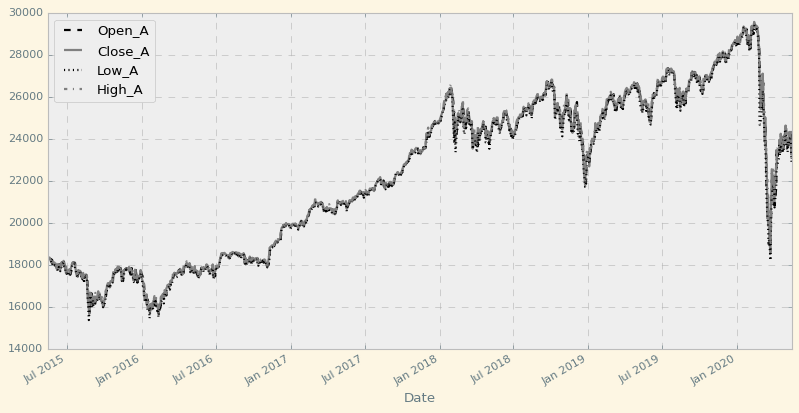

In [199]:
# Let's plot the data to check the visual discrepancies we found while studying descriptive statistics. 

valid_complete['Open_A'].plot(figsize=(12,6), linestyle='--', color='black', legend='Open_A')
valid_complete['Close_A'].plot(figsize=(12,6), linestyle='-', color='grey', legend='Close_A')
valid_complete['Low_A'].plot(figsize=(12,6), linestyle=':', color='black', legend='Low_A')
valid_complete['High_A'].plot(figsize=(12,6), linestyle='-.', color='grey', legend='High_A')

# The prices are matches our expectations as provided in descriptive statistics. 

<AxesSubplot: xlabel='Date'>

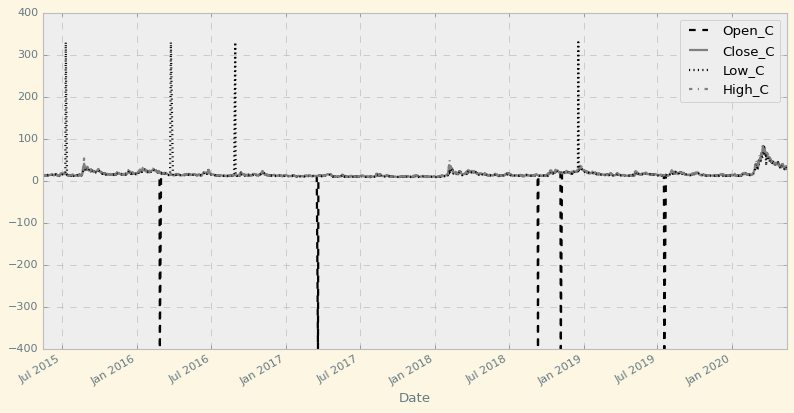

In [200]:
# Let's check the visualisation for C,

valid_complete['Open_C'].plot(figsize=(12,6), linestyle='--', color='black', legend='Open_C')
valid_complete['Close_C'].plot(figsize=(12,6), linestyle='-', color='grey', legend='Close_C')
valid_complete['Low_C'].plot(figsize=(12,6), linestyle=':', color='black', legend='Low_C')
valid_complete['High_C'].plot(figsize=(12,6), linestyle='-.', color='grey', legend='High_C')

It is obvious that this dataset has errorenous values, particularly `Open_C`, and `Low_C`. Hence, further data cleaning would be required to remove these outliers.

**IQR** and **z-score** are two most commonly used methods used to remove outliers.

----
### IQR 
The IQR method uses a percentile/quantile range of values over the entire dataset to identify and remove outliers. We usually use extereme percentile values such as 5% and 95% to minimize the risk of removing correct data points.

For our dataset, on using 25th & 75th percentile, we get the range is `(12.4, 17.68)`, so that would remove the outlier value of -400.

### z-score
The z-score (or standard score) is obtained by subtracting the mean of the dataset from each data point and normalizing the result by dividing the standard deviation of the dataset. 

In other words, the Z-score of a data point represents the distance in the number of standard deviations that the data point is away from the mean of all the data points.

For a normal distribution (applicable for large enough datasets) there is a distribution rule of 68-95-99, summarized as follows:

 - 68% of all data will lie in a range of one standard deviation from the mean.
 - 95% of all data will lie in a range of two standard deviations from the mean.
 - 99% of all data will lie within a range of three standard deviations from the mean.

So, after computing z-scores of all the data points in our dataset (which is large enough), there is approx. 1% change of a data point having a Z-score larger than or equal to 3. Hence, we can filter out all the observations with z-scores of 3 or higher and also, remove the outliers on the same. 

----


We will remove all the rows with values whose z-score is less than -6, and greater than +6, i.e, six standard deviations away from the mean. 

- `scipy.stats.zscore()` to compute z-scores of each column, in the prices_only dataframe.
- `numpy.abs` to get the magnitude of the z-scores.
- Select all the fields with z-scores < 6, and save in `no_outlier_prices` dataframe. 




In [201]:
no_outlier_prices = prices_only[(np.abs(stats.zscore(prices_only)) < 6).all(axis=1)]

<AxesSubplot: xlabel='Date'>

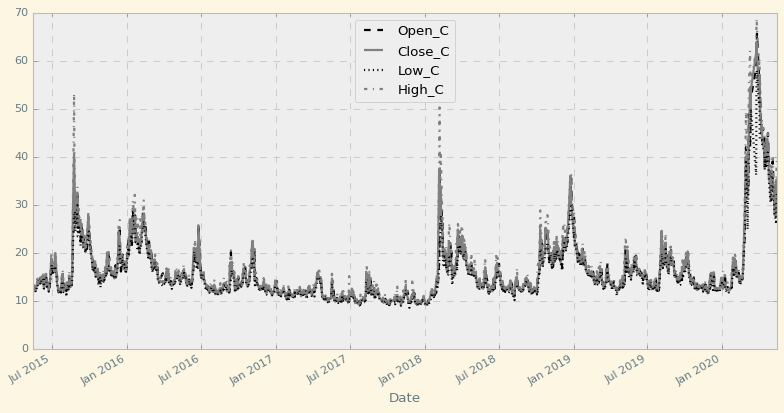

In [202]:
## Effect after outliers removal
no_outlier_prices['Open_C'].plot(figsize=(12,6), linestyle='--', color='black', legend='Open_C')
no_outlier_prices['Close_C'].plot(figsize=(12,6), linestyle='-', color='grey', legend='Close_C')
no_outlier_prices['Low_C'].plot(figsize=(12,6), linestyle=':', color='black', legend='Low_C')
no_outlier_prices['High_C'].plot(figsize=(12,6), linestyle='-.', color='grey', legend='High_C')

### Advanced Visualization Techniques

In [203]:
close_prices = no_outlier_prices[['Close_A', 'Close_B', 'Close_C']]

Check if there is any relationship between the close prices changes of the three instruments ... 
- `pandas.Dataframe.shift()` to shift the original dataframe, one period forward so that we can compute the price changes.
- `pandas.Dataframe.fillna()` here fixes, the one missing value generated in the first row as the result of  `shift`  operation.
- Rename the column to `Delta_Close_A`, `Delta_Close_B`, `Delta_Close_C`, to provide that these are price differences, not the actual prices. 

In [204]:
delta_close_prices = (close_prices.shift(-1) - close_prices).fillna(0)
delta_close_prices.columns = ['Delta_Close_A', 'Delta_Close_B', 'Delta_Close_C']
delta_close_prices

,Delta_Close_A,Delta_Close_B,Delta_Close_C
Date,,,
2015-05-15,26.320312,6.469971,0.350000
2015-05-18,13.509766,-1.369873,0.120000
2015-05-19,-26.650391,2.989990,-0.740000
...,...,...,...
2020-05-12,-516.808594,-50.120117,2.239998
2020-05-13,377.369141,32.500000,-2.669998
2020-05-14,0.000000,0.000000,0.000000


In [205]:
pd.set_option('display.max_rows', None)
delta_close_prices.describe()

,Delta_Close_A,Delta_Close_B,Delta_Close_C
count,1095.000000,1095.000000,1095.000000
mean,4.888383,0.666457,0.018475
std,268.137091,29.218995,1.938761
min,-2848.310547,-294.049805,-9.120001
25%,-70.894532,-7.140076,-0.760000
50%,15.539063,1.770020,-0.080000
75%,113.290039,12.255005,0.540001
max,1351.619141,154.510009,20.010001


It can be observed from the statistics that all three data values means are close to 0, with instrument A experiencing large price swings, and C experiencing significantly smaller price swings (check std).

<AxesSubplot: title={'center': 'Histogram of Delta_Close_A values roughly normally distributed around the 0 value'}, ylabel='Frequency'>

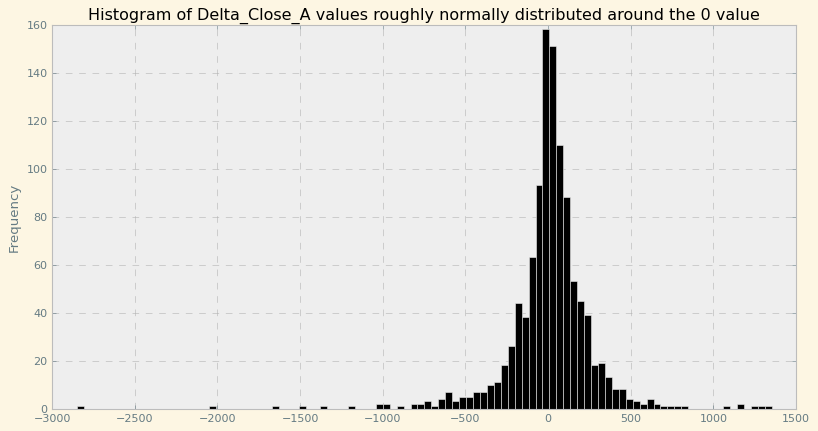

In [206]:
# Visualising Delta_Close_A, using a histogram plot. 

delta_close_prices['Delta_Close_A'].plot(kind="hist", bins=100, figsize=(12, 6), color='black', grid=True, title="Histogram of Delta_Close_A values roughly normally distributed around the 0 value")


We can see that disctibution is a normal distribution. Now, we do a boxplot, which also helps in assessing the values' distribution.

<AxesSubplot: title={'center': 'Box plot showing mean, median, IQR (25th to 75th percentile), and outliers'}>

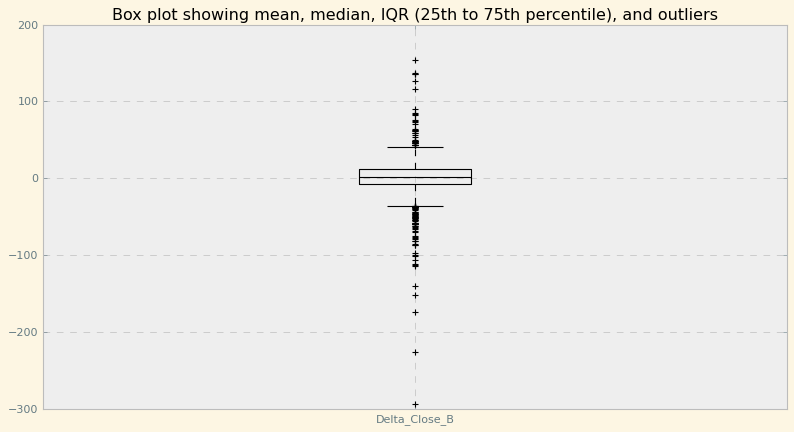

In [207]:
delta_close_prices['Delta_Close_B'].plot(kind='box', figsize=(12,6), color='black', grid=True, title="Box plot showing mean, median, IQR (25th to 75th percentile), and outliers")

**Multivariate Statistics**
- Assess the correlations b/w `Delta_Close_A`, `Delta_Close_B`, `Delta_Close_C`.
- Plot a correlation scatter matrix, that shows paiwise relationship between the three variables, as well as distribution of each individual variable. 

We will use Kernel Density Estimation (KDE), which is closely related to histograms but provides a smoother distribution surface across the plots on the diagonals.

array([[<AxesSubplot: xlabel='Delta_Close_A', ylabel='Delta_Close_A'>,
        <AxesSubplot: xlabel='Delta_Close_B', ylabel='Delta_Close_A'>,
        <AxesSubplot: xlabel='Delta_Close_C', ylabel='Delta_Close_A'>],
       [<AxesSubplot: xlabel='Delta_Close_A', ylabel='Delta_Close_B'>,
        <AxesSubplot: xlabel='Delta_Close_B', ylabel='Delta_Close_B'>,
        <AxesSubplot: xlabel='Delta_Close_C', ylabel='Delta_Close_B'>],
       [<AxesSubplot: xlabel='Delta_Close_A', ylabel='Delta_Close_C'>,
        <AxesSubplot: xlabel='Delta_Close_B', ylabel='Delta_Close_C'>,
        <AxesSubplot: xlabel='Delta_Close_C', ylabel='Delta_Close_C'>]],
      dtype=object)

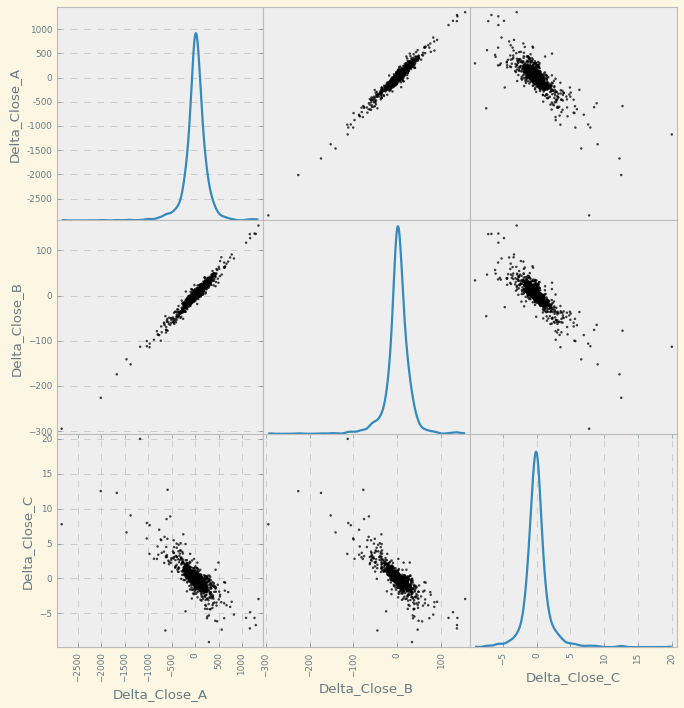

In [208]:
pd.plotting.scatter_matrix(delta_close_prices, figsize=(10,10), color='black', alpha=0.75, diagonal='kde', grid=True)

In [209]:
delta_close_prices.corr()

,Delta_Close_A,Delta_Close_B,Delta_Close_C
Delta_Close_A,1.000000,0.976104,-0.785566
Delta_Close_B,0.976104,1.000000,-0.817788
Delta_Close_C,-0.785566,-0.817788,1.000000


`Heatmap` is an alternative visulisation technique, available in `seaborn.heatmap()`

Text(0.5, 1.0, 'Seaborn heatmap visualizing pairwise correlations between Delta_Close fields')

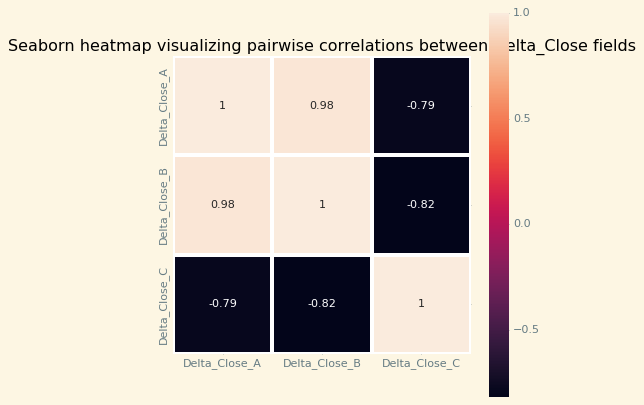

In [210]:
plt.figure(figsize=(6,6))
sn.heatmap(delta_close_prices.corr(), annot=True, square=True, linewidths=2)
plt.title("Seaborn heatmap visualizing pairwise correlations between Delta_Close fields")

The rightmost scale shows a legend where the darkest values represent the strongest negative correlation and the lightest values represent the strongest positive correlations:

The heatmap shows graphically the same message as the table in the previous section— there is a very high correlation between Delta_Close_A and Delta_Close_B and a very high negative correlation between Delta_Close_A and Delta_Close_C. There is also a very high negative correlation between Delta_Close_B and Delta_Close_C.

### Dataset Identities
- Dataset A is **Dow Jones Industrial Avergae (DJIA)**, a large cap equity index (ETF).
- Dataset B is **S&P 500 (SPY)**, another large cap equity index (ETF).
- Dataset C is the **Chicago Boards Options Exchange (CBOE)** Volatality Index (VIX) - which tracks how volatile markets are at any time (basically, a function of equity index price swings).

### Conclusions
- C **(VIX)** cannot have negative prices or prices above 90, which have historically been true.
- A **(DJIA)** & B **(SPY)** has huge drops in 2008 & 2020, corresponding to the stock market crash & COV19 pandemic, respectively. The price of C (VIX) spiked at same time, indicating heightened market turmoil. 
- A **(DJIA)** has largest daily price swings, followed by B **(SPY)**, and finally C **(VIX)** with very low daily price swings. 

A (DJIA) and B (SPY) have very strong positive correlations, which makes sense since both are large cap equity indices. C (VIX) has strong negative correlations with both A (DJIA) and B (SPY), which also makes sense since during periods of prosperity, volatility remains low and markets rise, and during periods of crisis, volatility spikes and markets drop.

In [212]:
# Special Python Libabries 
# EDA in single line of code

import dtale
dtale.show(valid_closedf)